In [24]:
import pandas as pd

data = pd.read_csv("user_profiles_for_ads.csv")

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [26]:
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


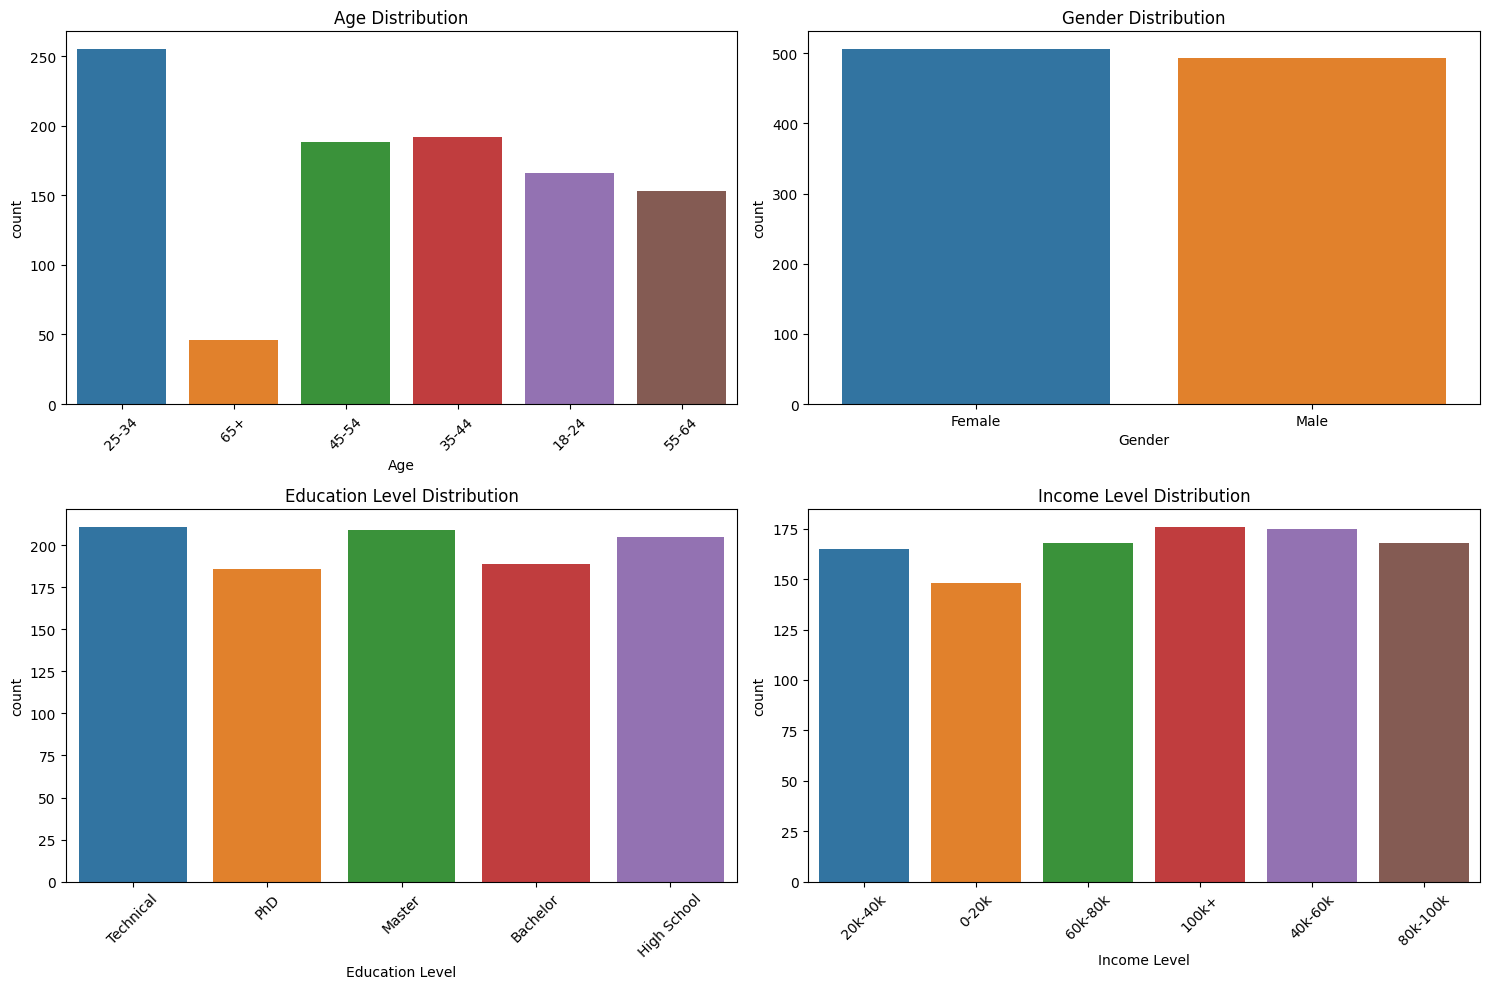

In [28]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age Distribution
sns.countplot(ax=axes[0, 0], 
              x='Age', 
              data=data, 
              hue='Age',      # Add hue parameter
              legend=False)    # Hide legend since it's redundant
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender Distribution
sns.countplot(ax=axes[0, 1], 
              x='Gender', 
              data=data,
              hue='Gender',    # Add hue parameter
              legend=False)    # Hide legend since it's redundant
axes[0, 1].set_title('Gender Distribution')

# Education Level Distribution
sns.countplot(ax=axes[1, 0], 
              x='Education Level', 
              data=data,
              hue='Education Level',    # Add hue parameter
              legend=False)             # Hide legend since it's redundant
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Income Level Distribution
sns.countplot(ax=axes[1, 1], 
              x='Income Level', 
              data=data,
              hue='Income Level',    # Add hue parameter
              legend=False)          # Hide legend since it's redundant
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

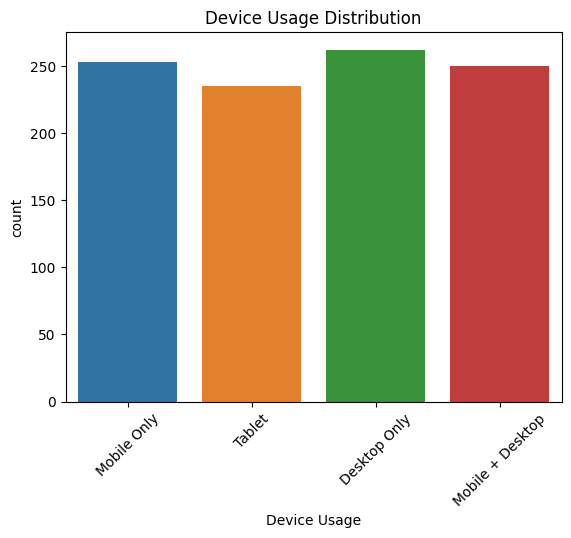

In [30]:
# Updated countplot without warning
sns.countplot(x='Device Usage', 
              data=data, 
              hue='Device Usage',    # Add hue parameter
              legend=False)          # Hide legend since it's redundant

plt.title('Device Usage Distribution')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

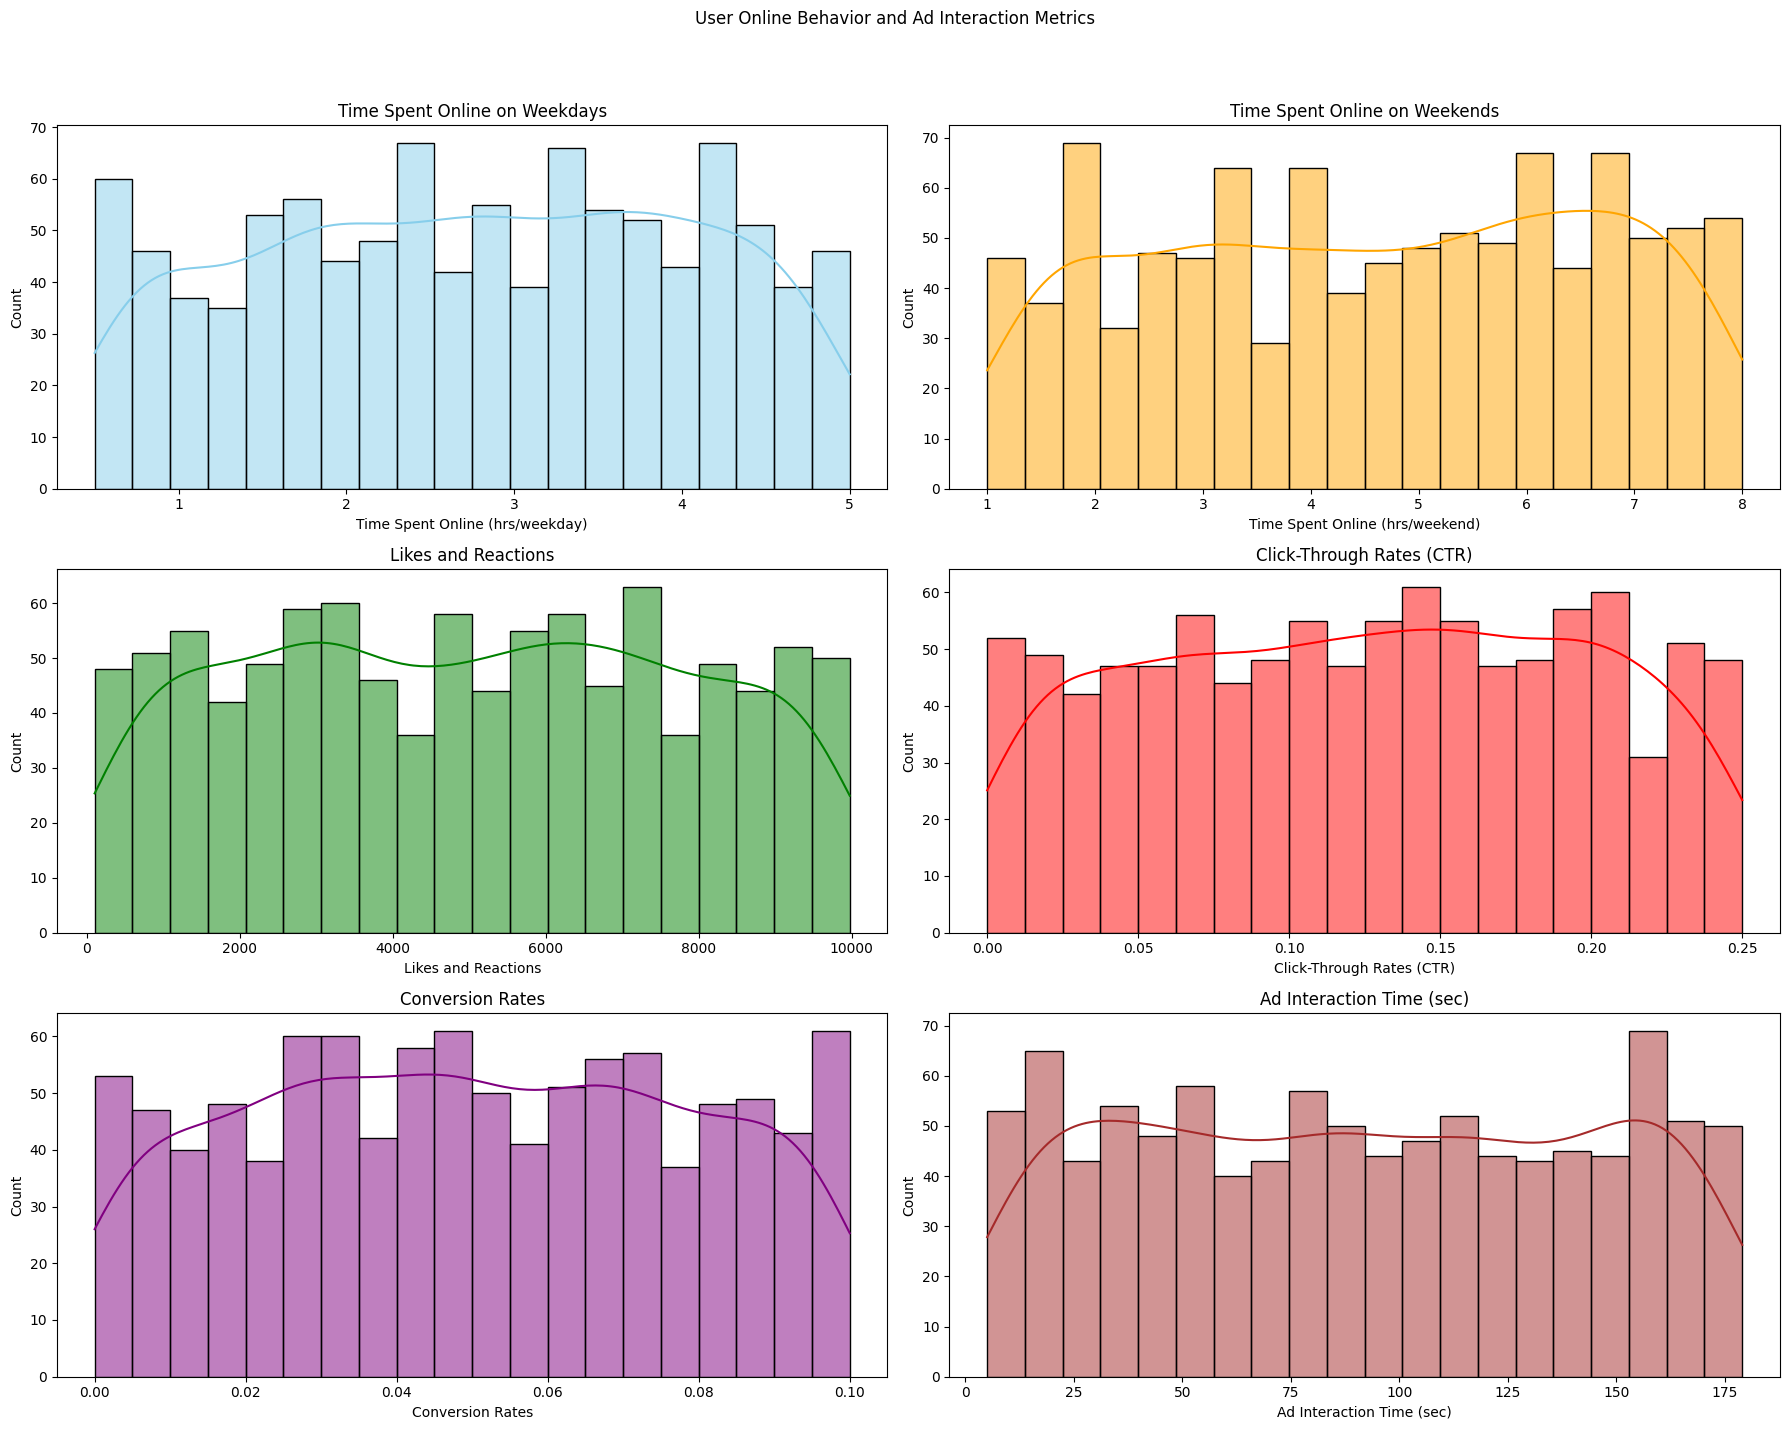

In [32]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

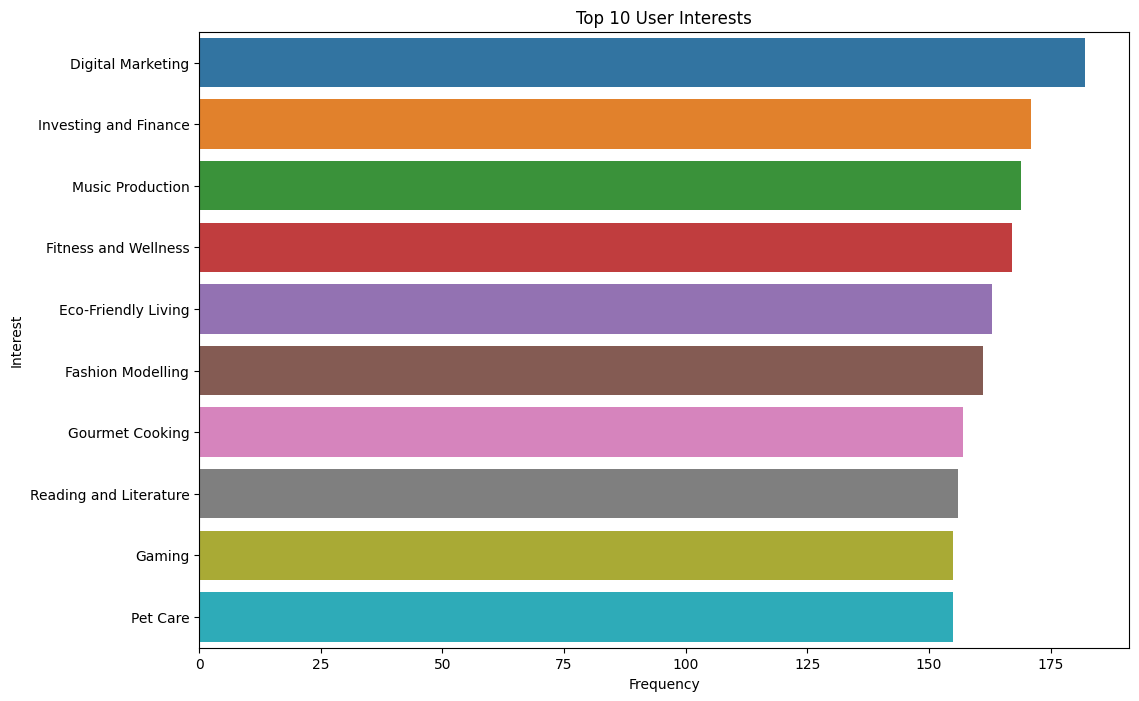

In [44]:
# Import necessary libraries
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
# Updated barplot parameters to remove the warning
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), hue='Interest', legend=False)
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [48]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               

In [52]:
import numpy as np

# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting using pd.concat
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]], ignore_index=True)

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

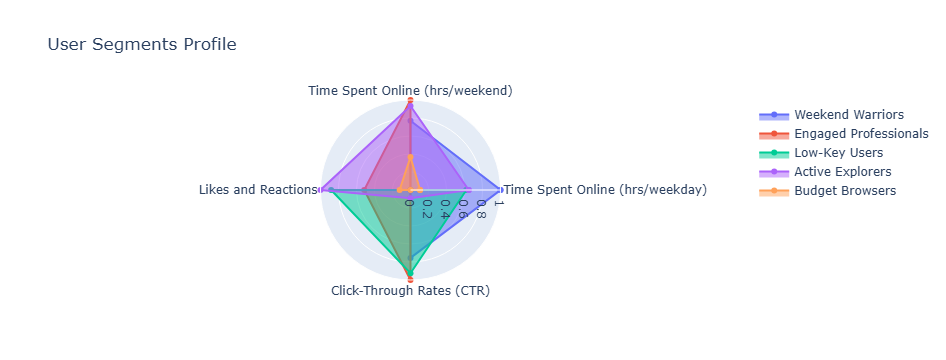

In [56]:
import plotly.graph_objects as go
fig = go.Figure()

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    # Get the values using iloc
    segment_values = radar_df_normalized.iloc[i][features_to_plot].values.tolist()
    first_value = radar_df_normalized.iloc[i][features_to_plot].iloc[0]  # Changed to .iloc[0]
    
    fig.add_trace(go.Scatterpolar(
        r=segment_values + [first_value],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, segment_values)] + 
             [f"{labels[0]}: {first_value:.2f}"]  # Adding hover text for each feature
    ))

# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()